
Classification Report for Wrong Moves Predictions:
              precision    recall  f1-score   support

           1       1.00      0.86      0.92         7
           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00        12
           4       0.88      1.00      0.93         7
           5       0.00      0.00      0.00         1

    accuracy                           0.94        31
   macro avg       0.73      0.77      0.75        31
weighted avg       0.91      0.94      0.92        31


============================== RANDOM FOREST PREDICTIONS ==============================

Player: Max
  Predicted Wrong Moves for Next 10 Rounds:
    Move 1: 9 Wrong Moves
    Move 2: 10 Wrong Moves
    Move 3: 14 Wrong Moves
    Move 4: 8 Wrong Moves
    Move 5: 8 Wrong Moves
    Move 6: 14 Wrong Moves
    Move 7: 7 Wrong Moves
    Move 8: 14 Wrong Moves
    Move 9: 14 Wrong Moves
    Move 10: 12 Wrong Moves

Player: Ash
  Predicted Wrong Moves for Next 

C:\Users\ashwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318

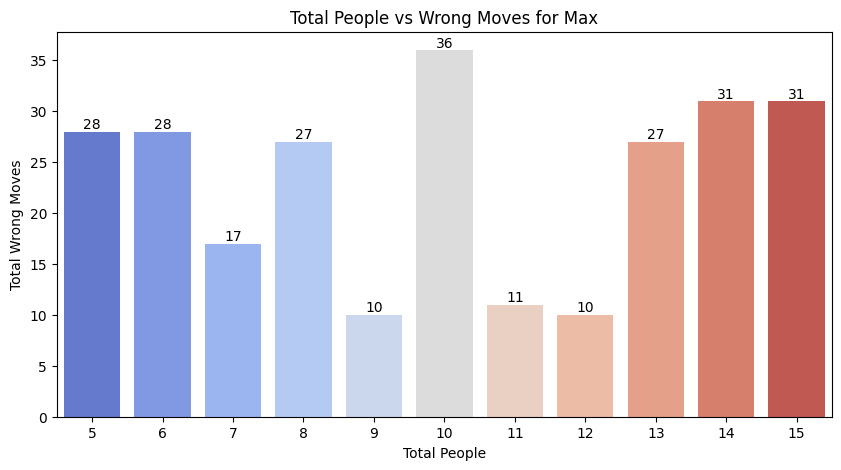

C:\Users\ashwi\AppData\Local\Temp\ipykernel_25564\686796644.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="People", y="WrongMoves", data=people_vs_wrong_moves, palette="coolwarm")


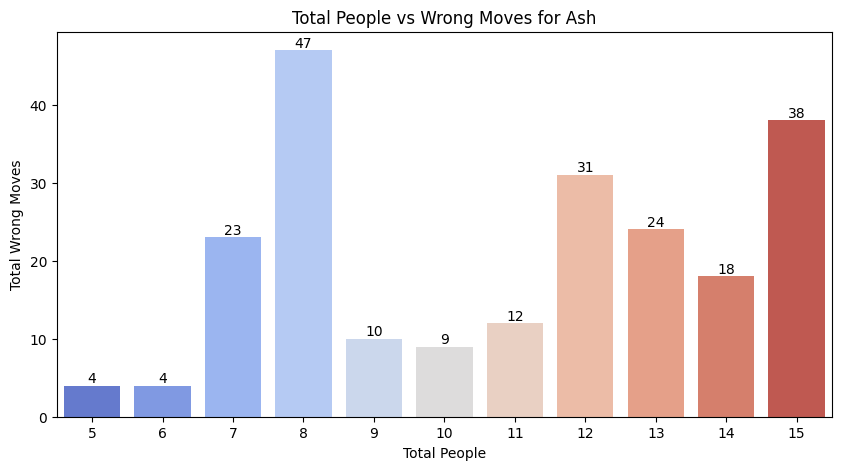

C:\Users\ashwi\AppData\Local\Temp\ipykernel_25564\686796644.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="People", y="WrongMoves", data=people_vs_wrong_moves, palette="coolwarm")


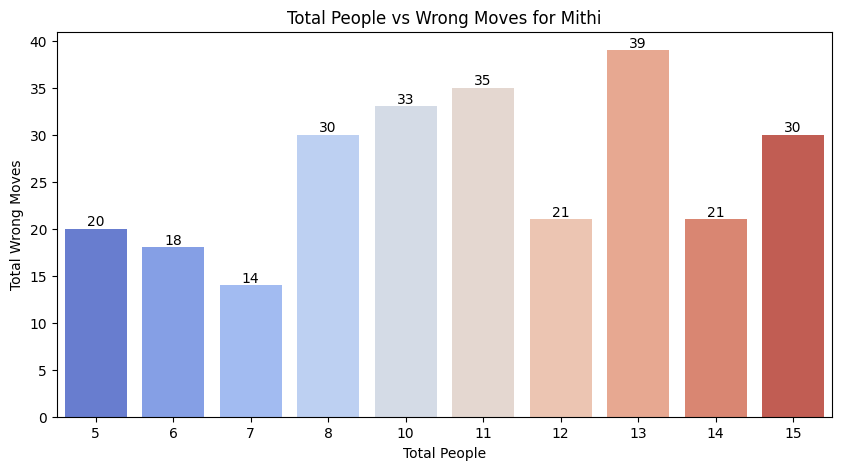

<Figure size 1200x600 with 0 Axes>

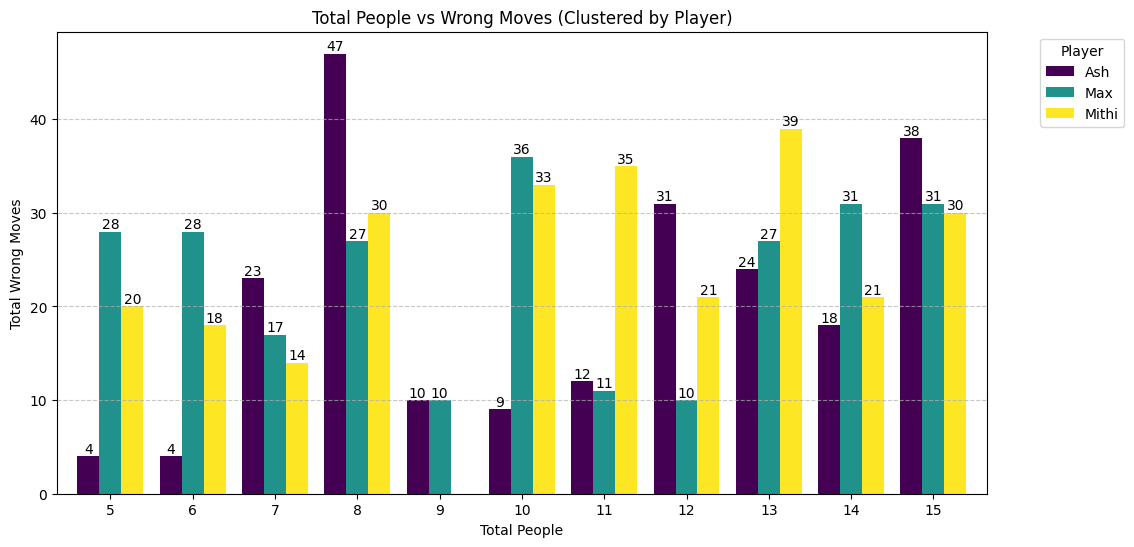

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, mean_absolute_error

# **Load the CSV file**
file_path = "E:/Review2 godot projects_AshwinRavi/Dataset/Josephus_2.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# **Preprocess the dataset**
df.columns = df.columns.str.strip()  # Clean column names
df.rename(columns={"Player Name": "Player", "Total People": "People", "Wrong Moves": "WrongMoves"}, inplace=True)

# **Encode categorical variables**
le_player = LabelEncoder()
df["Player"] = le_player.fit_transform(df["Player"])

# **Feature Engineering**
df["Move Ratio"] = df["WrongMoves"] / (df["People"] + 1)  

# **Select features and target**
X = df[["Player", "People", "Move Ratio"]]
y = df["WrongMoves"]

# **Scale numeric data**
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Train-Test Split**
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **Train Random Forest Model**
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# **Evaluate Model Performance**
y_pred = rf_model.predict(X_test)
y_pred = np.round(y_pred).astype(int)  # Convert to whole numbers
y_test = y_test.astype(int)  # Convert to integer for classification report

# Convert continuous moves into discrete categories for classification report
y_test_class = np.digitize(y_test, bins=np.linspace(min(y_test), max(y_test), 5))
y_pred_class = np.digitize(y_pred, bins=np.linspace(min(y_test), max(y_test), 5))

print("\nClassification Report for Wrong Moves Predictions:")
print(classification_report(y_test_class, y_pred_class))

# **Get unique players**
unique_players = df["Player"].unique()

# **Generate Predictions for Each Player**
print("\n" + "=" * 30 + " RANDOM FOREST PREDICTIONS " + "=" * 30)

for player in unique_players:
    # **Get latest player data**
    player_latest_moves = df[df["Player"] == player].tail(1)[X.columns].values
    if player_latest_moves.shape[0] == 0:
        continue  

    # **Scale latest move**
    player_latest_moves_scaled = scaler.transform(player_latest_moves)

    rf_preds = []

    for _ in range(10):
        # **Predict next wrong move count**
        rf_next_move = int(abs(rf_model.predict([player_latest_moves_scaled[0]])[0]))

        # **Add randomness for dynamic predictions**
        noise = np.random.randint(-3, 8)  
        rf_next_move += noise  

        # **Ensure values are non-negative & realistic**
        max_limit = player_latest_moves[0][1] * 2  # Limit max wrong moves
        rf_next_move = max(1, min(rf_next_move, max_limit))  

        rf_preds.append(rf_next_move)

        # **Update input dynamically**
        player_latest_moves_scaled[0][2] += rf_next_move * np.random.uniform(0.3, 0.8)
        player_latest_moves_scaled[0] = scaler.transform([player_latest_moves_scaled[0]])[0]

    # **Convert player ID back to name**
    player_name = le_player.inverse_transform([player])[0]

    # **Display Output in Structured List Format**
    print(f"\nPlayer: {player_name}")
    print("  Predicted Wrong Moves for Next 10 Rounds:")
    for i in range(10):
        print(f"    Move {i+1}: {rf_preds[i]} Wrong Moves")

# **Get unique players**
unique_players = df["Player"].unique()

# **Create individual clustered bar charts for each player**
for player in unique_players:
    player_name = le_player.inverse_transform([player])[0]  # Convert ID to name
    player_data = df[df["Player"] == player]  # Filter data for this player

    # Group by Total People and sum Wrong Moves
    people_vs_wrong_moves = player_data.groupby("People")["WrongMoves"].sum().reset_index()

    # **Create the bar chart**
    plt.figure(figsize=(10, 5))
    sns.barplot(x="People", y="WrongMoves", data=people_vs_wrong_moves, palette="coolwarm")

    # Add title and labels
    plt.title(f"Total People vs Wrong Moves for {player_name}")
    plt.xlabel("Total People")
    plt.ylabel("Total Wrong Moves")
    plt.xticks(rotation=0)

    # **Display Values on Bars**
    ax = plt.gca()
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only annotate non-zero values
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), 
                        ha='center', va='bottom', fontsize=10)

    plt.show()


# **Convert Player IDs back to Names for Readability**
df["Player Name"] = le_player.inverse_transform(df["Player"])

# **Group Data by Total People and Player, summing Wrong Moves**
grouped_df = df.groupby(["People", "Player Name"])["WrongMoves"].sum().unstack(fill_value=0)

# **Create a Clustered Bar Chart**
plt.figure(figsize=(12, 6))
grouped_df.plot(kind="bar", width=0.8, colormap="viridis", figsize=(12, 6))

# **Add Title and Labels**
plt.title("Total People vs Wrong Moves (Clustered by Player)")
plt.xlabel("Total People")
plt.ylabel("Total Wrong Moves")
plt.legend(title="Player", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# **Display Values on Bars**
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate non-zero values
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=10)

plt.show()



    

